In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

## Считаем данные с корректным Timestamp

In [2]:
raw_data = pd.read_csv('ms_bucket.csv').sort_values(by='timestamp')
raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp'], unit='s')
raw_data.head()

,timestamp,Inf,1,10,100,1000,10000,100000,110000,120000,...,40000,5,50,500,5000,50000,60000,70000,80000,90000
0,2019-08-01 09:00:00,88967916.0,56905292.0,72624894.0,88366166.0,88967203.0,88967824.0,88967916.0,88967916.0,88967916.0,...,88967916.0,69234222.0,87376013.0,88962228.0,88967673.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0
1,2019-08-01 09:05:00,88989154.0,56919502.0,72642881.0,88387255.0,88988441.0,88989062.0,88989154.0,88989154.0,88989154.0,...,88989154.0,69251570.0,87396803.0,88983465.0,88988911.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0
2,2019-08-01 09:10:00,89004769.0,56930005.0,72655984.0,88402809.0,89004056.0,89004677.0,89004769.0,89004769.0,89004769.0,...,89004769.0,69264172.0,87412166.0,88999080.0,89004526.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0
3,2019-08-01 09:15:00,89020289.0,56940760.0,72669292.0,88418257.0,89019576.0,89020197.0,89020289.0,89020289.0,89020289.0,...,89020289.0,69277029.0,87427447.0,89014598.0,89020046.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0
4,2019-08-01 09:20:00,89026526.0,56942467.0,72673669.0,88424408.0,89025813.0,89026434.0,89026526.0,89026526.0,89026526.0,...,89026526.0,69281089.0,87433403.0,89020835.0,89026283.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0


## Проверим данные на присутствие NaN

In [3]:
raw_data.isna().sum()

timestamp       0
Inf          5759
1            5759
10           5759
100          5759
1000         5759
10000        5759
100000       5759
110000       5759
120000       5759
2            5759
20           5759
200          5759
2000         5759
20000        5759
3            5759
30           5759
300          5759
3000         5759
30000        5759
4            5759
40           5759
400          5759
4000         5759
40000        5759
5            5759
50           5759
500          5759
5000         5759
50000        5759
60000        5759
70000        5759
80000        5759
90000        5759
dtype: int64

## Во всех столбцах (кроме timestamp) одинаковое количество пропущенных данных, можно сделать вывод, что какие-то отрезки данных просто пропущены
## Проверим это, начертив график (пропущенные отрезки просто не будут отображены)

2019-08-01 09:00:00
2019-08-30 08:55:00


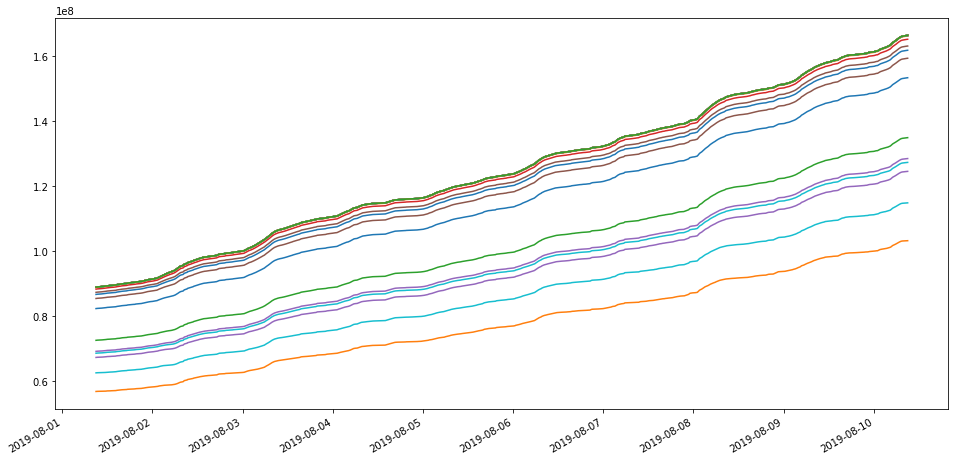

In [4]:
print(raw_data['timestamp'][0])
print(raw_data['timestamp'][raw_data.index.size - 1])

plt.figure(figsize=(16, 8))
for i in range(33):
    plt.plot(raw_data['timestamp'], raw_data.iloc[:, i + 1])

plt.gcf().autofmt_xdate()
plt.show()

## Вывод: во всех данных пропущен один и тот же отрезок, где-то с 10-го числа данные заканчиваются. Можно спокойно их выбросить

In [5]:
data = raw_data.dropna()

## Посмотрим, в каком порядке находятся столбцы и переставим так, чтобы числа шли по возрастанию, timestamp будет в конце

In [6]:
data.columns

Index(['timestamp', 'Inf', '1', '10', '100', '1000', '10000', '100000',
       '110000', '120000', '2', '20', '200', '2000', '20000', '3', '30', '300',
       '3000', '30000', '4', '40', '400', '4000', '40000', '5', '50', '500',
       '5000', '50000', '60000', '70000', '80000', '90000'],
      dtype='object')

In [7]:
data = data.reindex(['1', '2', '3', '4', '5', 
                     '10', '20', '30', '40', '50', 
                     '100', '200', '300', '400', '500', 
                     '1000', '2000', '3000', '4000', '5000', 
                     '10000', '20000', '30000', '40000', '50000',
                     '60000', '70000', '80000', '90000',
                     '100000', '110000', '120000', 'Inf', 'timestamp'], axis=1)
data.head()

,1,2,3,4,5,10,20,30,40,50,...,50000,60000,70000,80000,90000,100000,110000,120000,Inf,timestamp
0,56905292.0,62624703.0,67364370.0,68656945.0,69234222.0,72624894.0,82382694.0,85485163.0,86733464.0,87376013.0,...,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,2019-08-01 09:00:00
1,56919502.0,62639578.0,67380990.0,68674144.0,69251570.0,72642881.0,82402317.0,85505452.0,86754083.0,87396803.0,...,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,2019-08-01 09:05:00
2,56930005.0,62650737.0,67393096.0,68686606.0,69264172.0,72655984.0,82416791.0,85520424.0,86769304.0,87412166.0,...,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,2019-08-01 09:10:00
3,56940760.0,62662000.0,67405507.0,68699385.0,69277029.0,72669292.0,82431298.0,85535376.0,86784475.0,87427447.0,...,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,2019-08-01 09:15:00
4,56942467.0,62664298.0,67409098.0,68703350.0,69281089.0,72673669.0,82436566.0,85541023.0,86790298.0,87433403.0,...,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,2019-08-01 09:20:00


## Сделаем отдельную таблицу, чтобы значения показывали кол-во запросов в конкретный день, а не за всё время до этого дня

In [8]:
by_day = pd.DataFrame(data).iloc[:-1]
for i in range(data.shape[0] - 1):
    by_day.iloc[i] = data.iloc[i + 1] - data.iloc[i]
    by_day.iloc[i, 33] = data.iloc[i + 1]['timestamp']
by_day['timestamp'] = pd.to_datetime(by_day['timestamp'])
by_day.head()

,1,2,3,4,5,10,20,30,40,50,...,50000,60000,70000,80000,90000,100000,110000,120000,Inf,timestamp
0,14210.0,14875.0,16620.0,17199.0,17348.0,17987.0,19623.0,20289.0,20619.0,20790.0,...,21238.0,21238.0,21238.0,21238.0,21238.0,21238.0,21238.0,21238.0,21238.0,2019-08-01 09:05:00
1,10503.0,11159.0,12106.0,12462.0,12602.0,13103.0,14474.0,14972.0,15221.0,15363.0,...,15615.0,15615.0,15615.0,15615.0,15615.0,15615.0,15615.0,15615.0,15615.0,2019-08-01 09:10:00
2,10755.0,11263.0,12411.0,12779.0,12857.0,13308.0,14507.0,14952.0,15171.0,15281.0,...,15520.0,15520.0,15520.0,15520.0,15520.0,15520.0,15520.0,15520.0,15520.0,2019-08-01 09:15:00
3,1707.0,2298.0,3591.0,3965.0,4060.0,4377.0,5268.0,5647.0,5823.0,5956.0,...,6237.0,6237.0,6237.0,6237.0,6237.0,6237.0,6237.0,6237.0,6237.0,2019-08-01 09:20:00
4,597.0,1164.0,2402.0,2818.0,2920.0,3196.0,4104.0,4522.0,4732.0,4859.0,...,5224.0,5224.0,5224.0,5224.0,5224.0,5224.0,5224.0,5224.0,5224.0,2019-08-01 09:25:00


## Теперь сделаем так, чтобы числа показывали не все пакеты, обработанные за меньшее кол-во времени, а только те из них, которые обработаны за большее кол-во времени, чем ближайшее меньшее число (предыдущий столбец), чтобы избавиться от префиксности

In [9]:
for i in range(31, -1, -1):
    by_day.iloc[:, i + 1] -= by_day.iloc[:, i]
by_day.head()

,1,2,3,4,5,10,20,30,40,50,...,50000,60000,70000,80000,90000,100000,110000,120000,Inf,timestamp
0,14210.0,665.0,1745.0,579.0,149.0,639.0,1636.0,666.0,330.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:05:00
1,10503.0,656.0,947.0,356.0,140.0,501.0,1371.0,498.0,249.0,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:10:00
2,10755.0,508.0,1148.0,368.0,78.0,451.0,1199.0,445.0,219.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:15:00
3,1707.0,591.0,1293.0,374.0,95.0,317.0,891.0,379.0,176.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:20:00
4,597.0,567.0,1238.0,416.0,102.0,276.0,908.0,418.0,210.0,127.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:25:00


## Добавим информацию о суммарно обработанном кол-ве пакетов

In [10]:
by_day['summary'] = by_day.iloc[:, 0:34].sum(axis=1)
by_day.head()

,1,2,3,4,5,10,20,30,40,50,...,60000,70000,80000,90000,100000,110000,120000,Inf,timestamp,summary
0,14210.0,665.0,1745.0,579.0,149.0,639.0,1636.0,666.0,330.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:05:00,21238.0
1,10503.0,656.0,947.0,356.0,140.0,501.0,1371.0,498.0,249.0,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:10:00,15615.0
2,10755.0,508.0,1148.0,368.0,78.0,451.0,1199.0,445.0,219.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:15:00,15520.0
3,1707.0,591.0,1293.0,374.0,95.0,317.0,891.0,379.0,176.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:20:00,6237.0
4,597.0,567.0,1238.0,416.0,102.0,276.0,908.0,418.0,210.0,127.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:25:00,5224.0


In [11]:
by_day['Inf'].unique()

array([0.])

## Так как ни один пакет не обрабатывался больше 12 секунд, учитывать столбец Inf не будем. Также будем считать, что если пакет обрабатывался время $t$ и $a<=t<b$, то $t=(a+b)/2$

## Посчитаем средние значения и дисперсию по строкам
## Дисперсию посчитаем, как $D(X)=E(X^2)-E(X)^2$

In [12]:
times = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 
                  7.5, 15, 25, 35, 45, 
                  75, 150, 250, 350, 450, 
                  750, 1500, 2500, 3500, 4500, 
                  7500, 15000, 25000, 35000, 45000,
                  55000, 65000, 75000, 85000,
                  950000, 105000, 115000], dtype=np.float64)
by_day['mean'] = by_day.iloc[:, 0:32].to_numpy() @ times / by_day['summary']
by_day['variance'] = by_day.iloc[:, 0:32].to_numpy() @ (times ** 2) / by_day['summary'] - by_day['mean'] ** 2
by_day.head()

,1,2,3,4,5,10,20,30,40,50,...,80000,90000,100000,110000,120000,Inf,timestamp,summary,mean,variance
0,14210.0,665.0,1745.0,579.0,149.0,639.0,1636.0,666.0,330.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:05:00,21238.0,6.053513,359.402577
1,10503.0,656.0,947.0,356.0,140.0,501.0,1371.0,498.0,249.0,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:10:00,15615.0,5.567179,235.709864
2,10755.0,508.0,1148.0,368.0,78.0,451.0,1199.0,445.0,219.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:15:00,15520.0,5.308054,349.451043
3,1707.0,591.0,1293.0,374.0,95.0,317.0,891.0,379.0,176.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:20:00,6237.0,11.687751,605.471885
4,597.0,567.0,1238.0,416.0,102.0,276.0,908.0,418.0,210.0,127.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01 09:25:00,5224.0,16.331164,898.458478


## Построим графики

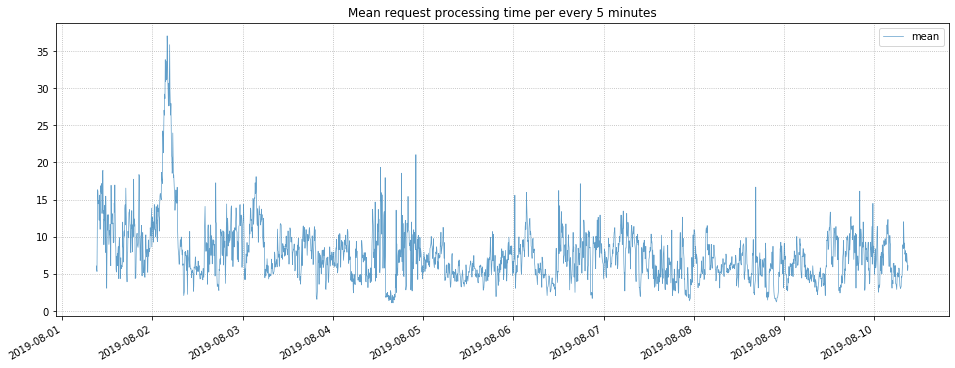

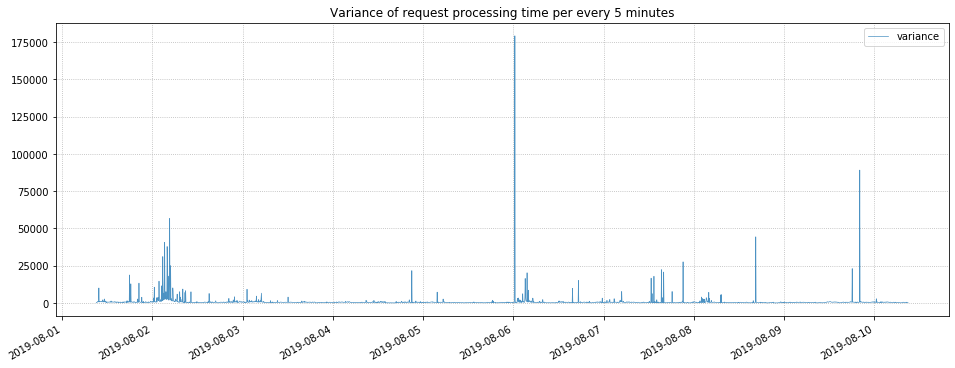

In [13]:
plt.figure(figsize=(16, 6))

plt.plot(by_day['timestamp'], by_day['mean'], 
         label='mean', alpha=0.7, linewidth=0.7)

plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Mean request processing time per every 5 minutes')
plt.grid(ls=':')
plt.show()


plt.figure(figsize=(16, 6))

plt.plot(by_day['timestamp'], by_day['variance'], 
         label='variance', alpha=0.8, linewidth=0.7)

plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Variance of request processing time per every 5 minutes')
plt.grid(ls=':')
plt.show()

## График дисперсии оказался не репрезентативным из-за выбросов больших значений, сделаем ещё один график, ограничив ось $y$

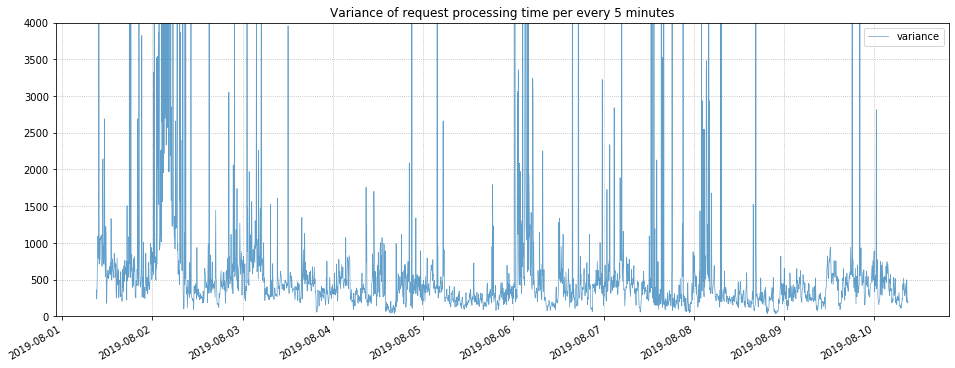

In [14]:
plt.figure(figsize=(16, 6))

plt.plot(by_day['timestamp'], by_day['variance'],
         label='variance', alpha=0.7, linewidth=0.7)

plt.gcf().autofmt_xdate()
plt.ylim(0, 4000)
plt.legend()
plt.title('Variance of request processing time per every 5 minutes')
plt.grid(ls=':')
plt.show()